In [ ]:
import os
!wget https://storage.googleapis.com/bert_models/2018_11_23/multi_cased_L-12_H-768_A-12.zip

if "bert" not in os.listdir():
  os.makedirs("bert")
else:
  pass

import zipfile
import shutil
         
bert_zip = zipfile.ZipFile('multi_cased_L-12_H-768_A-12.zip')
bert_zip.extractall('bert')
 
bert_zip.close()

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

copytree("bert/multi_cased_L-12_H-768_A-12", "bert")

--2020-05-26 03:07:27--  https://storage.googleapis.com/bert_models/2018_11_23/multi_cased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 662903077 (632M) [application/zip]
Saving to: ‘multi_cased_L-12_H-768_A-12.zip’

multi_cased_L-12_H- 100%[===================>] 632.19M  69.6MB/s    in 9.4s    

2020-05-26 03:07:36 (67.4 MB/s) - ‘multi_cased_L-12_H-768_A-12.zip’ saved [662903077/662903077]



In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
os.listdir('gdrive/My Drive/gongdoli')

['train_update2.CSV',
 'test_set.CSV',
 'train_update2__modi.CSV',
 'test_set_modi.CSV',
 'bert.h5',
 'train_set_data.csv',
 'test_set_data.csv',
 'bert.h6',
 'test_set_data.gsheet',
 'train_set_data.gsheet',
 'train_set_data_2.csv',
 'test_set_data_2.csv',
 'bert.h7',
 'bertembedding.pkl',
 'simBert.ipynb']

In [ ]:
path = "gdrive/My Drive/gongdoli"

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf

import pandas as pd
import numpy as np  
import re
import pickle

import keras as keras
from keras.models import load_model
from keras import backend as K
from keras import Input, Model
from keras import optimizers

import codecs
from tqdm import tqdm
import shutil

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
import warnings
import tensorflow as tf
warnings.filterwarnings(action='ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
tf.logging.set_verbosity(tf.logging.ERROR)

In [ ]:
!pip install keras-bert
!pip install keras-radam

  Created wheel for keras-bert: filename=keras_bert-0.81.0-cp36-none-any.whl size=37913 sha256=3fdada5878e6e95968d683fac741a44f3957536c2767845714a4a79d25e4490c
  Stored in directory: /root/.cache/pip/wheels/bd/27/da/ffc2d573aa48b87440ec4f98bc7c992e3a2d899edb2d22ef9e
  Created wheel for keras-transformer: filename=keras_transformer-0.33.0-cp36-none-any.whl size=13260 sha256=7df528611cdcbb3a10b1553ae585764afde37f4eb75cd76cbb8a45e227a421e6
  Stored in directory: /root/.cache/pip/wheels/26/98/13/a28402939e1d48edd8704e6b02f223795af4a706815f4bf6d8
  Created wheel for keras-pos-embd: filename=keras_pos_embd-0.11.0-cp36-none-any.whl size=7554 sha256=d8d0bc6e0dea330a962be8c91ba5772711bc5ad71939d4b5a82963c51450d5e7
  Stored in directory: /root/.cache/pip/wheels/5b/a1/a0/ce6b1d49ba1a9a76f592e70cf297b05c96bc9f418146761032
  Created wheel for keras-multi-head: filename=keras_multi_head-0.24.0-cp36-none-any.whl size=15511 sha256=6f8ea47008db8eb8173df8bdcbd9ebbdbef882b71b30576f93a11293a02d691b
  Stor

In [ ]:
from keras_bert import load_trained_model_from_checkpoint, load_vocabulary
from keras_bert import Tokenizer
from keras_bert import AdamWarmup, calc_train_steps

from keras_radam import RAdam

In [ ]:
os.listdir('bert')

['bert_model.ckpt.data-00000-of-00001',
 'bert_model.ckpt.meta',
 'bert_config.json',
 'bert_model.ckpt.index',
 'vocab.txt',
 'multi_cased_L-12_H-768_A-12']

In [ ]:
os.listdir(path)

['train_update2.CSV',
 'test_set.CSV',
 'train_update2__modi.CSV',
 'test_set_modi.CSV',
 'bert.h5',
 'train_set_data.csv',
 'test_set_data.csv',
 'bert.h6',
 'test_set_data.gsheet',
 'train_set_data.gsheet',
 'train_set_data_2.csv',
 'test_set_data_2.csv',
 'bert.h7',
 'bertembedding.pkl',
 'simBert.ipynb']

In [ ]:
#train = pd.read_table(path+"/train_update2.CSV")
#test = pd.read_table(path+"/test_set.CSV")
train = pd.read_csv(path+"/train_set_data_2.csv", header=None)
test = pd.read_csv(path+"/test_set_data_2.csv", header=None)

In [ ]:
train

,0,1,2,3
0,0,"원주, 즉 원의 둘레길이는 원에 내접하는 정다각형의 둘레의 길이보다는 길다. 이러한...",파이(pie)는 구운 과자의 일종이다. 본디 파이라는 이름은 쇼트 페이스트(쇼트 크...,1
1,1,두음은 단어의 첫소리를 말합니다. 두음법칙은 단어 첫소리에 올 수 없는 자음에 대한...,두음법칙(頭音法則)은 일제 강점기에 법으로 규정한 단어의 첫소리에 올 수 없는 자음...,1
2,2,"바로[直] 이어진[系] 높은[尊] 친속[屬] 직계는 증조부모, 조부모, 부모, 자녀...",직계존속(直系尊屬)이란 민법상 가장 가까운 혈족을 말하는 개념이다. 부계와 모계의 ...,1
3,3,"명사, 대명사, 수사, 조사, 동사, 형용사, 관형사, 부사, 감탄사와 같이 공통된...","품사(品詞)는 낱말을 문법적인 기능이나 형태, 뜻에 따라 몇 갈래로 나눈 것을 말한...",1
4,4,"사람, 사물, 장소나 눈에 보이지 않는 것 등의 이름을 가리키는 말. 주위를 둘러...",명사의 다른 뜻은 다음과 같다.\n\n명사(名詞)는 문법의 품사로 이름씨라고도 한다...,1
...,...,...,...,...
6595,3295,색의 짜임. 두 색 이상의 색을 섞어서 한 색만으로는 만들어낼 수 없는 색채 심리적...,길가메시(Gilgamesh)는 고대 메소포타미아 수메르 왕조 초기 시대인 우루크 제...,0
6596,3296,"당시의 유건악기 주자는 주어진 단음(單音)의 저음부 위에, 즉흥으로 오른손 파트를 ...",길가메시(Gilgamesh)는 고대 메소포타미아 수메르 왕조 초기 시대인 우루크 제...,0
6597,3297,"제이 리빙스턴과 레이 에반스 콤비가 작사 · 작곡한 왈츠 풍의 노래로, 알프레드 히...",긴다리소똥구리는 딱정벌레목 소똥구리과 소똥구리아과의 곤충이다. 수컷의 뒷다리가 길게...,0
6598,3298,프랑스 파리의 중심가. 센강(江)의 북안을 따라 전개된 콩코르드 광장에서 북서쪽으...,"긴가지해송은 산호의 일종으로, 대한민국의 천연기념물이다.",0


In [ ]:
SEQ_LEN = 128
BATCH_SIZE = 16
EPOCHS=2
LR=1e-5

pretrained_path ="bert"
config_path = os.path.join(pretrained_path, 'bert_config.json')
checkpoint_path = os.path.join(pretrained_path, 'bert_model.ckpt')
vocab_path = os.path.join(pretrained_path, 'vocab.txt')

DATA_COLUMN = "document"
LABEL_COLUMN = "label"

SETENCE1_COLUMN = 1
SETENCE2_COLUMN = 2
LABEL_COLUMN = 3


In [ ]:
token_dict = {}
with codecs.open(vocab_path, 'r', 'utf8') as reader:
    for line in reader:
        token = line.strip()
        if "_" in token:
          token = token.replace("_","")
          token = "##" + token
        token_dict[token] = len(token_dict)

In [ ]:
class inherit_Tokenizer(Tokenizer):
  def _tokenize(self, text):
        if not self._cased:
            text = text
            
            text = text.lower()
        spaced = ''
        for ch in text:
            if self._is_punctuation(ch) or self._is_cjk_character(ch):
                spaced += ' ' + ch + ' '
            elif self._is_space(ch):
                spaced += ' '
            elif ord(ch) == 0 or ord(ch) == 0xfffd or self._is_control(ch):
                continue
            else:
                spaced += ch
        tokens = []
        for word in spaced.strip().split():
            tokens += self._word_piece_tokenize(word)
        return tokens

In [ ]:
tokenizer = inherit_Tokenizer(token_dict)

In [ ]:
tokenizer.tokenize("파이썬은 인터프리터 언어이다", "파이썬은 컴파일러 언어이다")

['[CLS]',
 '파',
 '##이',
 '##썬',
 '##은',
 '인',
 '##터',
 '##프',
 '##리',
 '##터',
 '언',
 '##어',
 '##이다',
 '[SEP]',
 '파',
 '##이',
 '##썬',
 '##은',
 '컴',
 '##파',
 '##일',
 '##러',
 '언',
 '##어',
 '##이다',
 '[SEP]']

In [ ]:
def convert_data(data_df):
    global tokenizer
    indices, targets = [], []
    for i in tqdm(range(len(data_df))):
        ids, segment = tokenizer.encode(data_df[SETENCE1_COLUMN][i], data_df[SETENCE2_COLUMN][i], max_len=SEQ_LEN)
        indices.append(ids)
        targets.append(data_df[LABEL_COLUMN][i])
    items = list(zip(indices, targets))
    
    indices, targets = zip(*items)
    indices = np.array(indices)
    return [indices, np.zeros_like(indices)], np.array(targets)

def load_data(pandas_dataframe):
    data_df = pandas_dataframe
    
    
    data_df[SETENCE1_COLUMN] = data_df[SETENCE1_COLUMN].astype(str)
    data_df[SETENCE2_COLUMN] = data_df[SETENCE2_COLUMN].astype(str)


    data_x, data_y = convert_data(data_df)

    return data_x, data_y

In [ ]:
#print(train[LABEL_COLUMN])
train_x, train_y = load_data(train)
test_x, test_y = load_data(test)

100%|██████████| 1078/1078 [00:00<00:00, 1354.79it/s]


In [ ]:
train_x

[array([[   101,   9612,  16323, ...,   9634,  48132,    102],
        [   101,   9102,  32158, ...,  11466,  27056,    102],
        [   101,  71433,    164, ...,  48345,    119,    102],
        ...,
        [   101,   9672,  10739, ...,  14102,    119,    102],
        [   101,  47364,   9901, ...,      0,      0,      0],
        [   101, 105787,   9993, ...,   9711,  41693,    102]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [ ]:
def sentence_convert_data(data):
    global tokenizer
    indices = []
    for i in tqdm(range(len(data))):
        print(tokenizer.tokenize(data[i]))
        ids, segments = tokenizer.encode(data[i], max_len=SEQ_LEN)
        indices.append(ids)
        
    items = indices
    indices = np.array(indices)
    return [indices, np.zeros_like(indices)]

def sentence_load_data(sentences):#sentence는 List로 받는다
           
    data_x = sentence_convert_data(sentences)

    return data_x

In [ ]:
layer_num = 12
model = load_trained_model_from_checkpoint(
    config_path,
    checkpoint_path,
    training=True,
    trainable=True,
    seq_len=SEQ_LEN,)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        (None, 128)          0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      (None, 128)          0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 128, 768), ( 91812096    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 128, 768)     1536        Input-Segment[0][0]              
____________________________________________________________________________________________

In [ ]:
def get_bert_finetuning_model(model):
  inputs = model.inputs[:2]
  dense = model.layers[-3].output
  outputs = keras.layers.Dense(1, activation='sigmoid',kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.02),
                              name = 'real_output')(dense)



  bert_model = keras.models.Model(inputs, outputs)
  bert_model.compile(
      optimizer=RAdam(learning_rate=0.00001, weight_decay=0.0025),
      loss='binary_crossentropy',
      metrics=['accuracy'])
  
  return bert_model

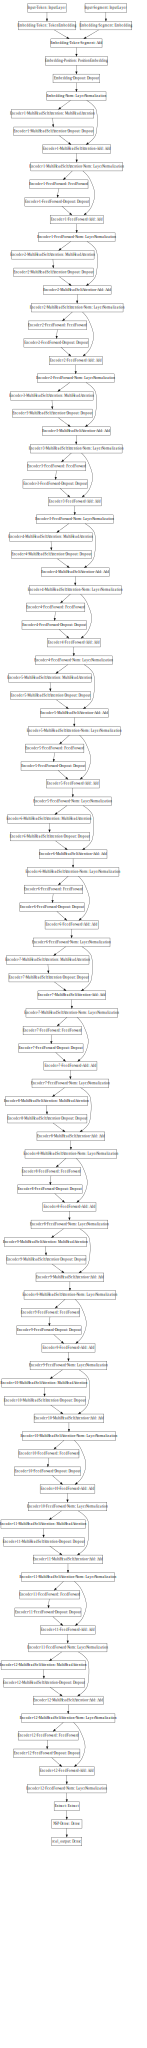

In [ ]:
from IPython.display import SVG
from keras.utils import model_to_dot


SVG(model_to_dot(get_bert_finetuning_model(model), dpi=65).create(prog='dot', format='svg'))


In [ ]:
sess = K.get_session()
uninitialized_variables = set([i.decode('ascii') for i in sess.run(tf.report_uninitialized_variables())])
init = tf.variables_initializer([v for v in tf.global_variables() if v.name.split(':')[0] in uninitialized_variables])
sess.run(init)

bert_model = get_bert_finetuning_model(model)
history = bert_model.fit(train_x, train_y, epochs=2, batch_size=16, verbose = 1, validation_data=(test_x, test_y), shuffle=True)

bert_model.save_weights(path+"/bert.h7")

Train on 6600 samples, validate on 1078 samples
Epoch 1/2
6600/6600 [==============================] - 10541s 2s/step - loss: 0.4626 - accuracy: 0.7703 - val_loss: 0.2459 - val_accuracy: 0.9258
Epoch 2/2
6600/6600 [==============================] - 10682s 2s/step - loss: 0.1420 - accuracy: 0.9579 - val_loss: 0.2132 - val_accuracy: 0.9286


In [ ]:
#bert_model.save_weights(path+"/bert.h5")
#bert_model.save_weights(path+"/bert.h6")
#모델 저장

In [ ]:
bert_model = get_bert_finetuning_model(model)
#bert_model.load_weights(path+"/bert.h5")
bert_model.load_weights(path+"/bert.h7")
#모델 불러오기

In [ ]:
def predict_convert_data(data_df):
    global tokenizer
    indices = []
    for i in tqdm(range(len(data_df))):
        ids, segment = tokenizer.encode(data_df[SETENCE1_COLUMN][i], data_df[SETENCE2_COLUMN][i], max_len=SEQ_LEN)
        indices.append(ids)
        
    items = indices
    
    
    indices = np.array(indices)
    return [indices, np.zeros_like(indices)]

def predict_load_data(x): #Pandas Dataframe을 인풋으로 받는다
    data_df = x
    
    
    data_df[SETENCE1_COLUMN] = data_df[SETENCE1_COLUMN].astype(str)
    data_df[SETENCE2_COLUMN] = data_df[SETENCE2_COLUMN].astype(str)


    data_x = predict_convert_data(data_df)

    return data_x

In [ ]:
test_set = predict_load_data(test)

100%|██████████| 1078/1078 [00:00<00:00, 1339.29it/s]


In [ ]:
test_set

[array([[  101,  9417, 28396, ..., 20309, 18227,   102],
        [  101,   100,  9765, ...,  9638, 48599,   102],
        [  101,  9672,   123, ..., 10459,  8925,   102],
        ...,
        [  101,  9559, 12605, ...,   119,   119,   102],
        [  101, 48556,  8926, ...,  9524, 26737,   102],
        [  101,  9273, 14040, ..., 10892,  9931,   102]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [ ]:
preds = bert_model.predict(test_set)

In [ ]:
# 다르면 0, 같다면 1 출력
preds

array([[0.98778176],
       [0.986057  ],
       [0.9876524 ],
       ...,
       [0.0185759 ],
       [0.019798  ],
       [0.07836185]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_true = test[3]
# F1 Score 확인
print(classification_report(y_true, np.round(preds,0)))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       539
           1       0.92      0.94      0.93       539

    accuracy                           0.93      1078
   macro avg       0.93      0.93      0.93      1078
weighted avg       0.93      0.93      0.93      1078



In [ ]:
def get_feature_map(model):
  inputs = model.input
  outputs = model.layers[-2].output
  feature_model = Model(inputs, outputs)
  return feature_model

In [ ]:
bert_feature = get_feature_map(bert_model)

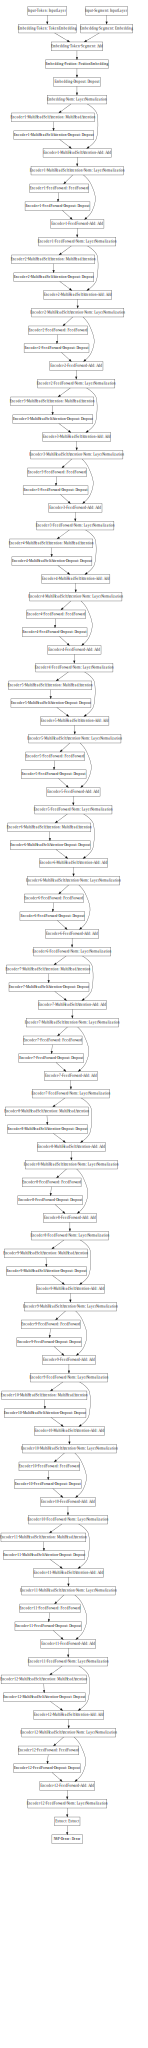

In [ ]:
SVG(model_to_dot(bert_feature, dpi=65).create(prog='dot', format='svg'))

In [ ]:
bert_weight_list = bert_feature.predict(test_set)

In [ ]:
bert_weight_list

array([[-0.922072  , -0.11194211,  0.18817104, ...,  0.85908735,
         0.46628624, -0.6115638 ],
       [-0.8450771 , -0.09959558,  0.59740126, ...,  0.72845924,
         0.5949006 , -0.41485277],
       [-0.87495476,  0.2763397 ,  0.12863757, ...,  0.9198419 ,
         0.23610365, -0.65071505],
       ...,
       [ 0.854084  , -0.23569928, -0.2987022 , ..., -0.81168413,
        -0.29718804,  0.812657  ],
       [ 0.888498  , -0.14515996, -0.22261697, ..., -0.896413  ,
        -0.24647729,  0.8096871 ],
       [ 0.79820323, -0.45500082,  0.29410344, ..., -0.8096872 ,
         0.203752  ,  0.83120054]], dtype=float32)

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
bert_embedded = PCA(n_components=256).fit_transform(bert_weight_list)
bert_embedded = TSNE(n_components=3).fit_transform(bert_embedded)
bert_embedded

array([[ 3.3564267 , -0.539394  , -8.6591015 ],
       [ 8.194585  ,  5.2546325 , -4.15387   ],
       [-3.4994519 , -0.05554043, -6.3671594 ],
       ...,
       [-2.465613  , -7.7788925 ,  9.664852  ],
       [-3.4692497 , -2.9743907 ,  9.645979  ],
       [-0.3270721 ,  7.0009637 , 10.606751  ]], dtype=float32)

In [ ]:
with open(path+"/bertembedding.pkl", "wb") as f:
  pickle.dump(bert_embedded, f)

In [ ]:
with open(path+"/bertembedding.pkl", "rb") as f:
  bert_embedded = pickle.load(f)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import seaborn as sns

In [ ]:
test

,0,1,2,3
0,3300,샌프란시스코 일대에서 37명을 살해한 연쇄 살인마 ‘조디악’을 소재로 한 영화. 〈...,"조디악(zodiac)은 황도대(黃道帶), 12궁 등을 뜻하는 영어 단어이다.\n\n...",1
1,3301,"‘추방하는 것’이란 뜻. 초현실주의에서 쓰이는 말로, 일상적인 관계에서 사물을 추방...",데페이즈망(dépaysement)은 주로 우리의 주변에 있는 대상들을 매우 사실적으...,1
2,3302,제 2차 세계대전 이후 많은 전위극들이 등장했는데 그 중 대표적인 것이 프랑스를 중...,"부조리극(不條理劇, 프랑스어: théâtre de l'absurde 테아트르 드 랍...",1
3,3303,"서양인들이 들어오자 일본 게이샤들은 이들을 상대로 영업을 하게 되었고, 매춘과 국제...",《나비 부인》(이탈리아어: Madama Butterfly)은 자코모 푸치니가 작곡하...,1
4,3304,색채의 삼속성 중 명도와 채도를 통합한 개념. 색상과 채도의 복합적 용어인 색도와 ...,"색상(色相)은 명도, 채도와 함께 색의 주요한 세 속성 가운데 하나이다. HSV 색...",1
...,...,...,...,...
1073,3834,푸른색을 띠는 강옥 (Corundum)의 일종으로 육방정계의 결정형을 갖는 광물이다...,"""Ms"" 또는 ""Ms."" (보통 미즈 /ˈmɪz/, 그리고 강세를 받지 않을 때는 ...",0
1074,3835,"미스 홍콩 2위 입상자로, 초기에는 유치한 코미디에서 뾰로통하게 굴거나 액션 영화 ...","""Moon River""(문 리버)는 1961년에 발표한 노래로 조니 머서(Johnn...",0
1075,3836,에스파냐의 북서부 갈리시아주의 주도 산티아고데콤포스텔라에 있는 대성당. 10세기에...,"""Hoppípolla"" (ˈhɔʰpipʰɔtla, ""Hopp í polla"", 아이...",0
1076,3837,"한국 근대 화가로 호는 춘곡(春谷)이다. 서울에서 출생, 서울에서 사망했다. 190...","""Fly Me to the Moon""(플라이 미 투 더 문)은 작곡가 바트 하워드(...",0


In [ ]:
def get_tsne_plot(rot1=-20, rot2=100):
  fig = plt.figure(figsize=(5,5))
  ax = Axes3D(fig)
  colors = 'b', 'r'
  labels = 0, 1
  for i, c, label in zip(range(np.shape(bert_embedded)[0]), colors, labels):
    ax.scatter(bert_embedded[test[3]==label,0], bert_embedded[test[3]==label,1], bert_embedded[test[3]==label,2], s=2, c=c, alpha=0.5)
  ax.view_init(rot1, rot2)
  print("rot1:%d" % rot1, "rot2:%d" % rot2)
  plt.legend(labels, loc='upper right')
  plt.show()

In [ ]:
import time
for j in range(-180, 180, 45):
  for i in range(-180,180,45):
  
    get_tsne_plot(i, j)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def sentence_convert_data(sentence1, sentece2):
    global tokenizer
    indices = []
    ids, segments = tokenizer.encode(sentence1, sentece2, max_len=SEQ_LEN)
    indices.append(ids)
        
    items = indices
    indices = np.array(indices)
    return [indices, np.zeros_like(indices)]

def evaluation_predict(sentence1, sentece2):
    data_x = sentence_convert_data(sentence1, sentece2)
    print(data_x)
    predict = bert_model.predict(data_x)
    print(predict)
    predict_answer = np.round(np.ravel(predict), 0).item()
    
    if predict_answer == 0:
      print("다른 의미입니다.")
    elif predict_answer == 1:
      print("같은 의미입니다.")

In [ ]:
evaluation_predict("사과는 과일이다","사과는 과일이 아니다")

[array([[  101,  9405, 11882, 11018,  8898, 18392, 11925,   102,  9405,
        11882, 11018,  8898, 18392, 10739,  9519, 48345,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
     

In [ ]:
evaluation_predict("사과는 과일이다","배는 과일이다")

[array([[  101,  9405, 11882, 11018,  8898, 18392, 11925,   102,  9330,
        11018,  8898, 18392, 11925,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
     

In [ ]:
evaluation_predict("불국사는 경주에있는 건축물이다","운영체제는 컴퓨터의 최고 관리자로써 하드웨어를 통제한다")

[array([[   101,   9368,  20479,  64379,   8885,  16323,  10530,  84177,
          8865,  70122,  29364,  11925,    102,  91988,  29683,  87164,
          9802, 119410,  21876,  10459,  83491,   8900,  12692,  57713,
         73131,   9952,  15001, 119173,  80940,   9879,  17730,  14102,
           102,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,

In [ ]:
evaluation_predict("사과는 과일이다", "사과는 과일일 수 도 있고 아닐 수 도 있다")

[[0.9661008]]
같은 의미입니다.


In [ ]:
evaluation_predict("파이썬", "니체")

[array([[   101,   9901,  10739, 119096,    102,   9049,  29683,    102,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,

In [ ]:
evaluation_predict("1", "2")

[[0.60101974]]
같은 의미입니다.


In [ ]:
evaluation_predict("기능을 구현하기 위해서 딥러닝기술을 도입했다", "이순신은 거북선으로 왜구를 물리쳤다.")

[array([[   101,   8932, 100819,   8908,  30842,  22440,  19905,  12424,
          9126,  30873, 106065,  12310,  51945,  10622,   9087,  58303,
         12490,    102,   9638, 119064,  25387,  10892,   8863,  82512,
         18471,  11467,   9596,  97371,   9299,  12692,  90821,    119,
           102,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,

In [ ]:
evaluation_predict("운영체제는 소프트웨어다", "운영체제는 소프트웨어가 아니다")

[array([[   101,  91988,  29683,  87164,   9448,  90927, 119173,  12965,
         11903,    102,  91988,  29683,  87164,   9448,  90927, 119173,
         12965,  11287,   9519,  48345,    102,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,